In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import json


with open('/content/ansuman-simanta-sekhar-bhujabala_new.json', 'r') as f:
    data = json.load(f)



Average Monthly Posting Frequency: 0.12 posts per month
Average Post Length: 239.80 words


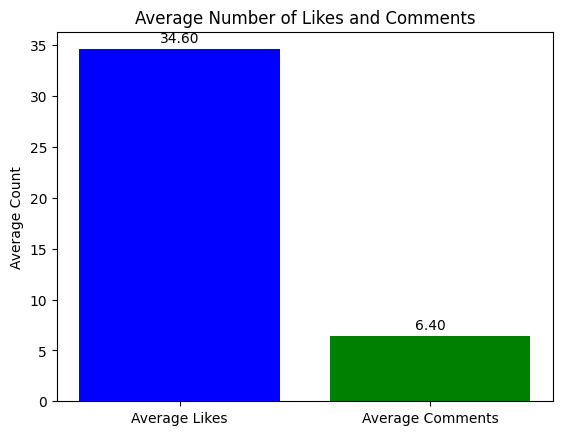

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import re
data = data

# Convert data into DataFrame
df = pd.DataFrame(data)

# Convert likes and comments to integers
df['likes'] = df['likes'].astype(int)
df['comments'] = df['comments'].apply(lambda x: int(x.split()[0]))

# Function to convert post_date into months ago
def convert_to_date(post_date):
    months_map = {'mo': 1, 'yr': 12}
    time_part = post_date.split('•')[0].strip()

    match = re.match(r'(\d+)([a-z]+)', time_part)
    if match:
        time_units = int(match.group(1))
        time_type = match.group(2)
        return time_units * months_map.get(time_type, 1)
    else:
        return None

# Convert post dates into numeric months
df['months_ago'] = df['post_date'].apply(convert_to_date)

# 1. Calculate average monthly posting frequency
total_months = df['months_ago'].sum()
average_posts_per_month = len(df) / total_months
print(f"Average Monthly Posting Frequency: {average_posts_per_month:.2f} posts per month")

# 2. Calculate average post length
average_post_length = df['post_length'].mean()
print(f"Average Post Length: {average_post_length:.2f} words")

# 3. Calculate average likes and comments
average_likes = df['likes'].mean()
average_comments = df['comments'].mean()

# 4. Plot Bar Graph - Average Likes and Comments
fig, ax = plt.subplots()
bars = ax.bar(['Average Likes', 'Average Comments'], [average_likes, average_comments], color=['blue', 'green'])

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Labeling the plot
plt.ylabel('Average Count')
plt.title('Average Number of Likes and Comments')
plt.show()
